In [1]:
import sys
import os
current_path = os.path.abspath(os.getcwd())
sys.path.append(os.path.join(current_path, os.pardir, 'Class'))

from Dataset_function import *
from Preprocess import *
from TopicModel import *
from LdaAnalysis import *
from Inference import *
from Similarity import *

In [2]:
from statsmodels.graphics.gofplots import qqplot
from matplotlib import pyplot
from scipy import stats
from scipy.stats import shapiro

/home/stsapoui/Project/env/lib/python3.8/site-packages/patsy/constraint.py:13: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3, and in 3.10 it will stop working
  from collections import Mapping


In [3]:
data_train, abstract_train, body_train, data_val, abstract_val, body_val = extract_Paper("CiteSeerX")

oai:CiteSeerX.psu:10.1.1.1.6092 not found


In [4]:
data_eval, abstract_eval, body_eval = extract_Evaluation()

arXiv:2010.10614 not found
arXiv:2011.01098 not found
arXiv:2011.10319 not found
arXiv:2101.05177 not found
arXiv:2103.04283 not found
arXiv:2103.07395 not found
arXiv:2104.04604 not found
arXiv:2105.06877 not found
arXiv:2106.00844 not found
arXiv:2106.01726 not found
arXiv:2106.10081 not found
arXiv:2107.01621 not found
arXiv:2107.02679 not found
arXiv:2107.08921 not found
arXiv:2107.09333 not found
arXiv:2107.11834 not found


In [5]:
data_eval

,Title,Author,Date,Journal,Field,Classification
arXiv:1506.02082,A Real-time Cargo Damage Management System via...,"{""Philip B. Alipour"",""Matteus Magnusson"",""Mart...",None,None,computer,[cs.AI]
arXiv:1810.06992,Topographic Representation for Quantum Machine...,"{""Bruce MacLennan""}",None,None,computer,"[cs.LG, quant-ph, stat.ML]"
arXiv:2005.06964,Big Computing: Where are we heading,"{""Sabuzima Nayak"",""Ripon Patgiri"",""Thoudam Dor...",None,None,computer,[cs.DC]
arXiv:2005.07531,6G Communications: A Vision on the Potential A...,"{""Sabuzima Nayak"",""Ripon Patgiri""}",None,None,computer,[cs.NI]
arXiv:2006.02107,KCN: Knowledge Centric Networking,"{""Marinos Charalambides"",""Daphne Tuncer"",""Ning...",None,None,computer,[cs.NI]
...,...,...,...,...,...,...
arXiv:2107.13066,Removing Operational Friction Using Process Mi...,"{""Wil van der Aalst"",""Tobias Brockhoff"",""Anahi...",None,None,computer,"[cs.DB, cs.LG]"
arXiv:2107.13069,Tensor diagrams and cluster combinatorics at p...,"{""Chris Fraser"",""Pavlo Pylyavskyy""}",None,None,math,[math.CO]
arXiv:2107.13299,Trees and Homogeneous LOTS,"{""Ethan Akin"",""Karel Hrbacek""}",None,None,math,"[math.GN, math.DS]"
arXiv:2107.13320,A Case Study on the Stability of Performance T...,"{""Simon Eismann"",""Diego Elias Costa"",""Lizhi Li...",None,None,computer,"[cs.DC, cs.SE]"


In [7]:
body_eval3 = Preprocessing3("body_eval3",body_eval,list(data_eval.index))
body_eval3.execute()

Time to train the last preprocessing : 154.68212270736694 sec


In [8]:
abstract_eval3 = Preprocessing3("abstract_eval3",abstract_eval,list(data_eval.index))
abstract_eval3.execute()

Time to train the last preprocessing : 2.83001446723938 sec


In [9]:
body_eval3.save("Saved Data")
abstract_eval3.save("Saved Data")

In [6]:
body_eval3 = Preprocessing3('body_eval3')
body_eval3.load('Saved Data/body_eval3.pickle')

abstract_eval3 = Preprocessing3('abstract_eval3')
abstract_eval3.load('Saved Data/abstract_eval3.pickle')

In [7]:
body_eval3.create_dictionary()
print(body_eval3.get_dictionary())
abstract_eval3.create_dictionary()
print(abstract_eval3.get_dictionary())

Dictionary(52475 unique tokens: ['10fig', '1fig1', '1the', '2fig', '2phasecontainers']...)
Dictionary(4783 unique tokens: ['actuallydamaged', 'agent', 'array', 'assume', 'calculate']...)


In [8]:
final_lda_body3 = LDAMallet("final_lda_body3", _)
final_lda_body3.load("Saved Data/final_lda_body3.pickle")

final_lda_abstract3_v2 = LDAMallet("final_lda_abstract3_v2", _)
final_lda_abstract3_v2.load("Saved Data/final_lda_abstract3_v2.pickle")

In [13]:
inference_body_eval3 = Inference('inference_body_eval3', final_lda_body3, body_eval3) 

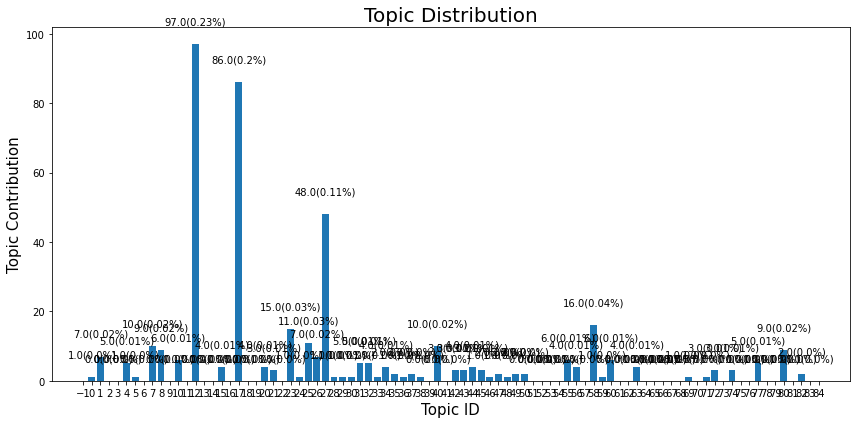

In [14]:
inference_body_eval3.get_model().topic_repartition()

In [15]:
inference_body_eval3.save("Saved Data")

In [9]:
inference_abstract_eval3_v2 = Inference('inference_abstract_eval3_v2', final_lda_abstract3_v2, abstract_eval3) 

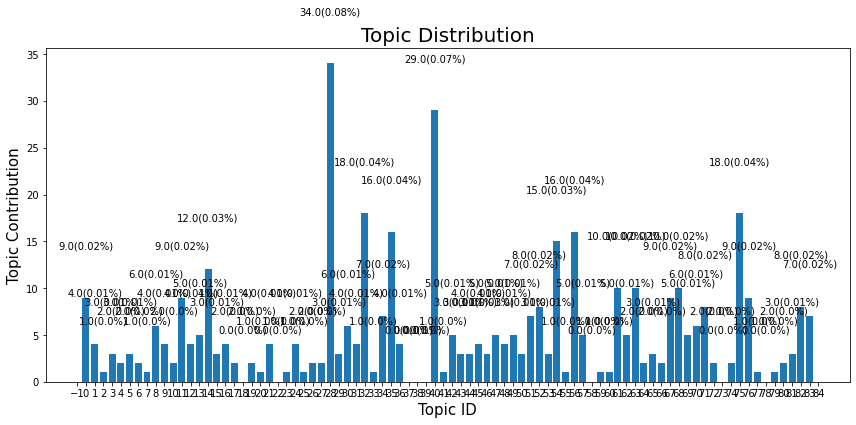

In [10]:
inference_abstract_eval3_v2.get_model().topic_repartition()

In [11]:
inference_abstract_eval3_v2.save("Saved Data")

### Start to run here

In [5]:
body_eval3 = Preprocessing3('body_eval3')
body_eval3.load('Saved Data/body_eval3.pickle')

abstract_eval3 = Preprocessing3('abstract_eval3')
abstract_eval3.load('Saved Data/abstract_eval3.pickle')

final_lda_body3 = LDAMallet("final_lda_body3", _)
final_lda_body3.load("Saved Data/final_lda_body3.pickle")

final_lda_abstract3_v2 = LDAMallet("final_lda_abstract3_v2", _)
final_lda_abstract3_v2.load("Saved Data/final_lda_abstract3_v2.pickle")

inference_body_eval3 = Inference('inference_body_eval3', final_lda_body3, body_eval3) 
inference_abstract_eval3_v2 = Inference('inference_abstract_eval3_v2', final_lda_abstract3_v2, abstract_eval3) 

In [6]:
final_lda_abstract3_v2.compute_Word_Topic_Distribution()
final_lda_body3.compute_Word_Topic_Distribution()

### Defining tag list from the evaluation set

In [7]:
tag = [elem for liste in list(data_eval["Classification"]) for elem in liste]
tag = list(set(tag))

In [8]:
tag

['cs.HC',
 'nucl-ex',
 'astro-ph.IM',
 'cs.DC',
 'hep-ex',
 'physics.app-ph',
 'cond-mat.other',
 'math.NT',
 'hep-ph',
 'q-bio.CB',
 'math.GT',
 'physics.bio-ph',
 'math.QA',
 'physics.med-ph',
 'math.FA',
 'math.GR',
 'math.AP',
 'math.CO',
 'math.PR',
 'eess.AS',
 'physics.optics',
 'astro-ph.GA',
 'eess.IV',
 'cond-mat.dis-nn',
 'cs.ET',
 'math-ph',
 'q-bio.BM',
 'q-bio.QM',
 'stat.ME',
 'cond-mat.supr-con',
 'cs.CE',
 'nlin.CD',
 'nlin.PS',
 'cs.MM',
 'cs.CV',
 'eess.SP',
 'cs.DS',
 'cond-mat.quant-gas',
 'cs.LO',
 'astro-ph.SR',
 'q-bio.OT',
 'math.AG',
 'math.LO',
 'physics.flu-dyn',
 'math.HO',
 'math.RT',
 'cs.DM',
 'math.AT',
 'eess.SY',
 'cs.SE',
 'cs.OH',
 'quant-ph',
 'cs.PL',
 'physics.ins-det',
 'q-bio.SC',
 'math.DG',
 'cs.SD',
 'hep-lat',
 'math.CT',
 'cond-mat.mes-hall',
 'physics.geo-ph',
 'astro-ph.EP',
 'stat.ML',
 'cond-mat.soft',
 'q-bio.NC',
 'cond-mat.str-el',
 'stat.AP',
 'math.RA',
 'cs.PF',
 'physics.acc-ph',
 'cs.RO',
 'cs.DB',
 'cs.MS',
 'cs.NI',
 'physics

### At this point, we will try two different ways to calculate similarity between two documents

### The list of avalaible measure

In [9]:
measures = ["JSD","cosine","chebyshev","L2","minkowski", "braycurtis", "canberra", "manhattan", "correlation"]

In [10]:
similarity = SimilarityV2('Similarity1_v2', final_lda_abstract3_v2, final_lda_body3, inference_abstract_eval3_v2, inference_body_eval3)

KeyboardInterrupt: 

### Visualization of the similarity score distribution with a target document and the entire training set

In [ ]:
similarity.most_similar_sorted(0, measures, 0.5)

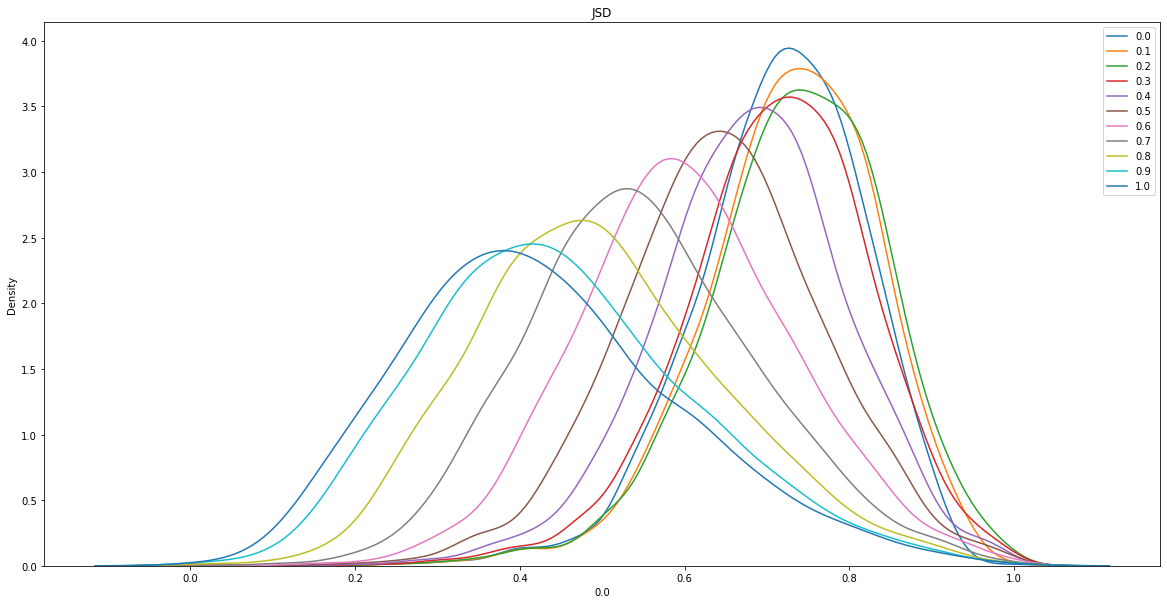

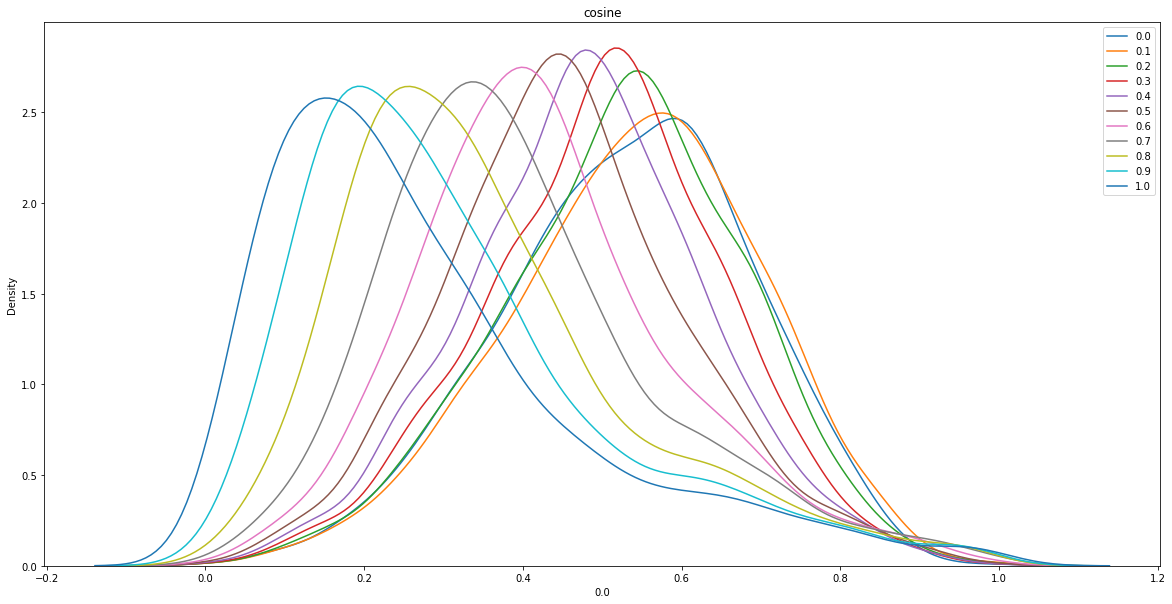

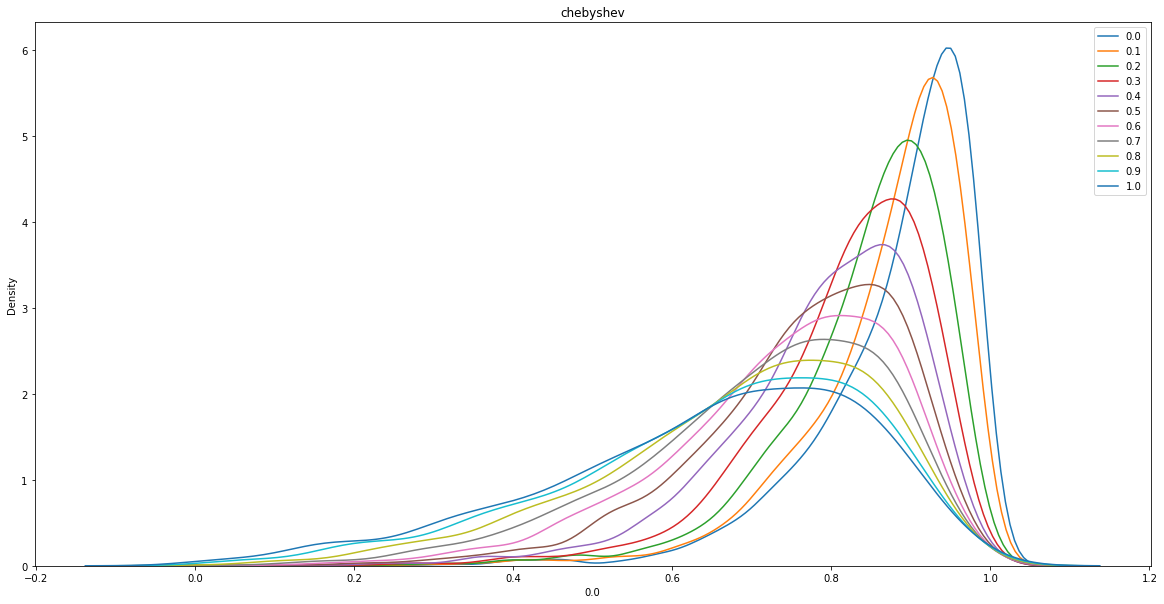

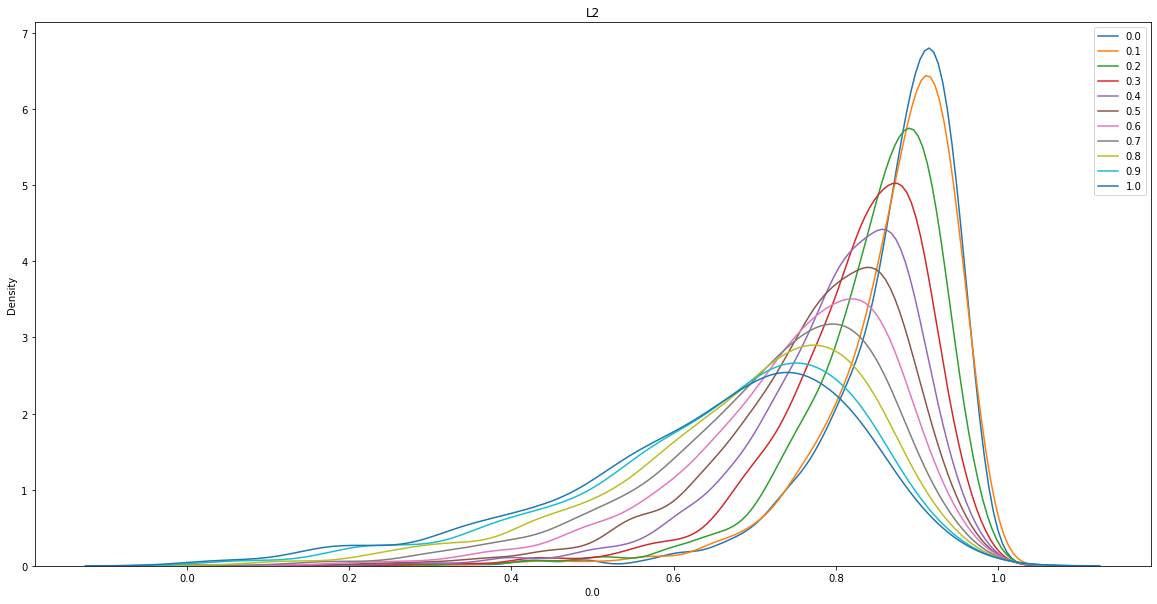

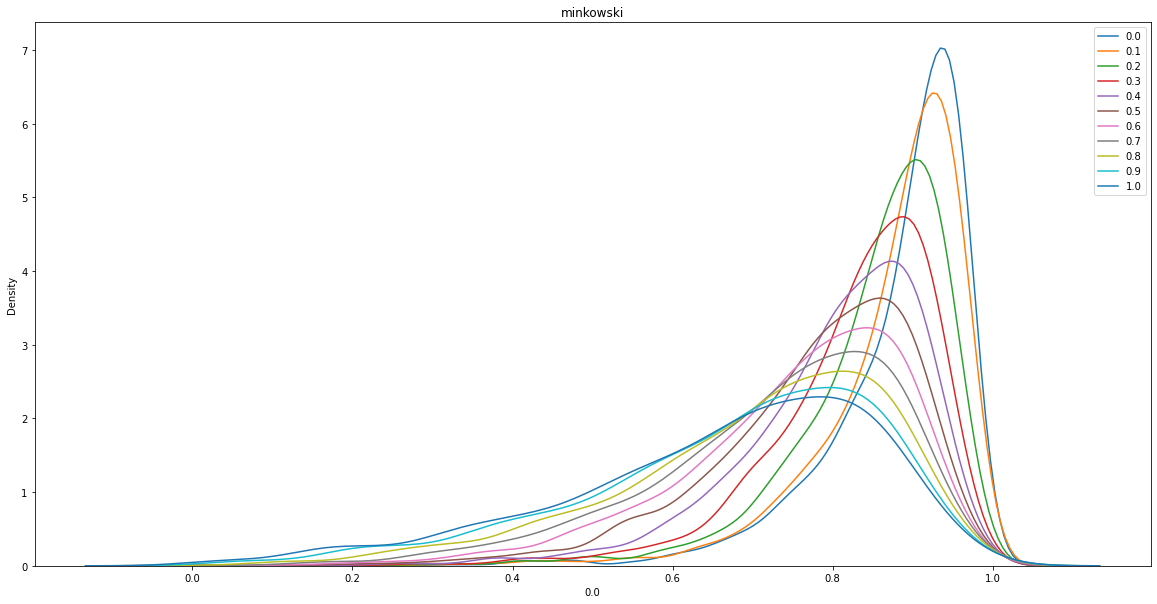

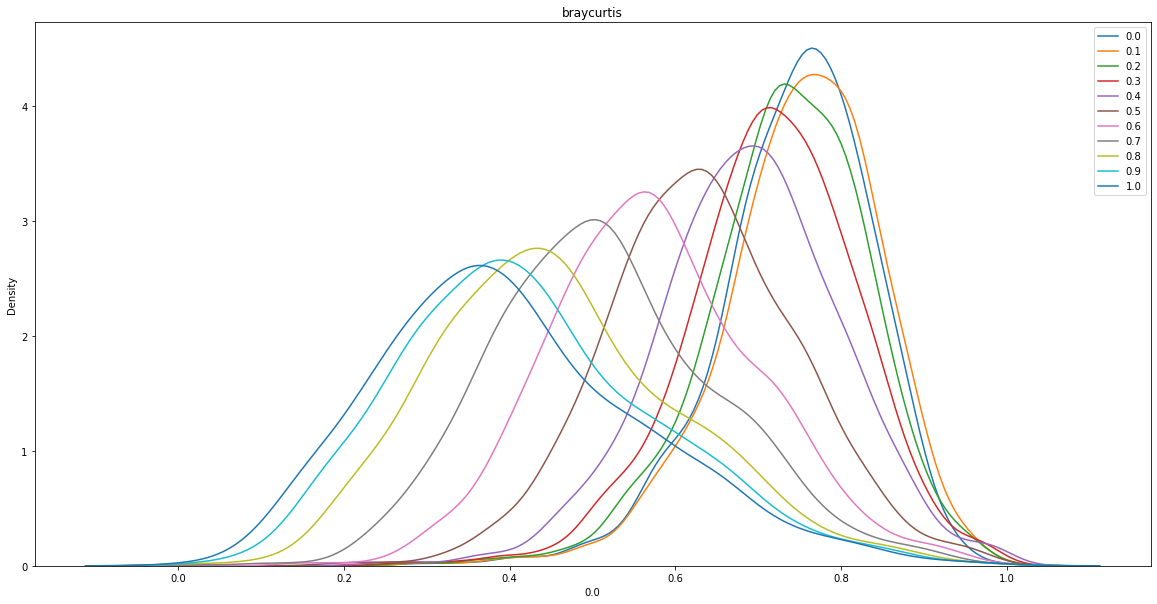

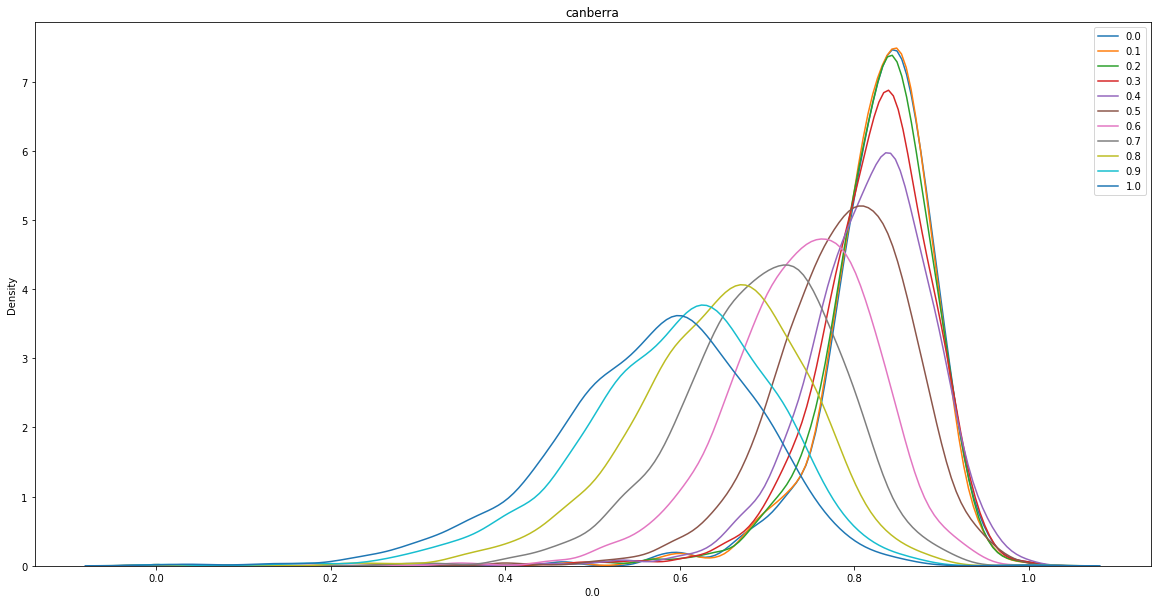

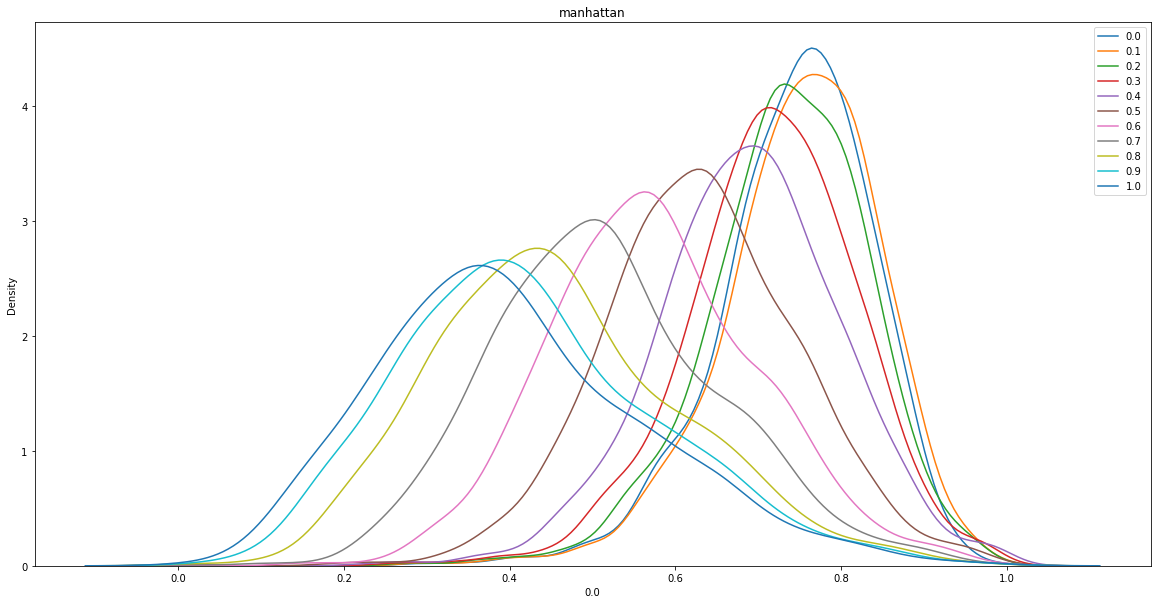

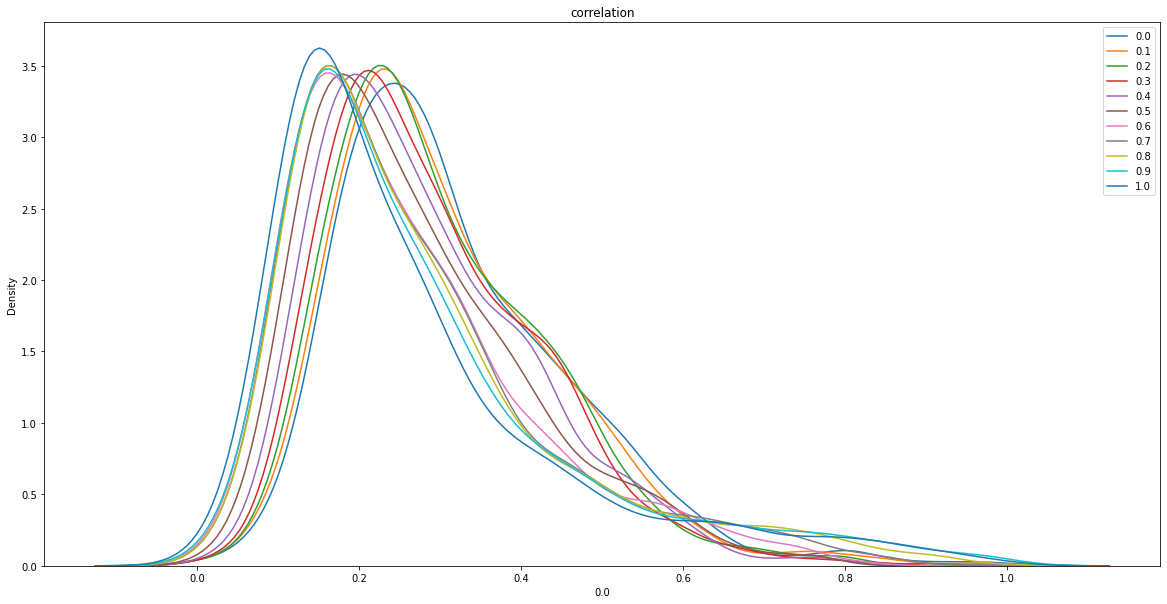

In [12]:
similarity.similarity_distribution(0, measures)

### Measure Normalisation

In [13]:
ms = {measure : [] for measure in measures}
for measure in measures:
    ms1 = similarity.most_similar_sorted(0, measure, 0.5)
    ms1 = np.array([m[1] for m in ms1])
    ms[measure] += list(ms1)

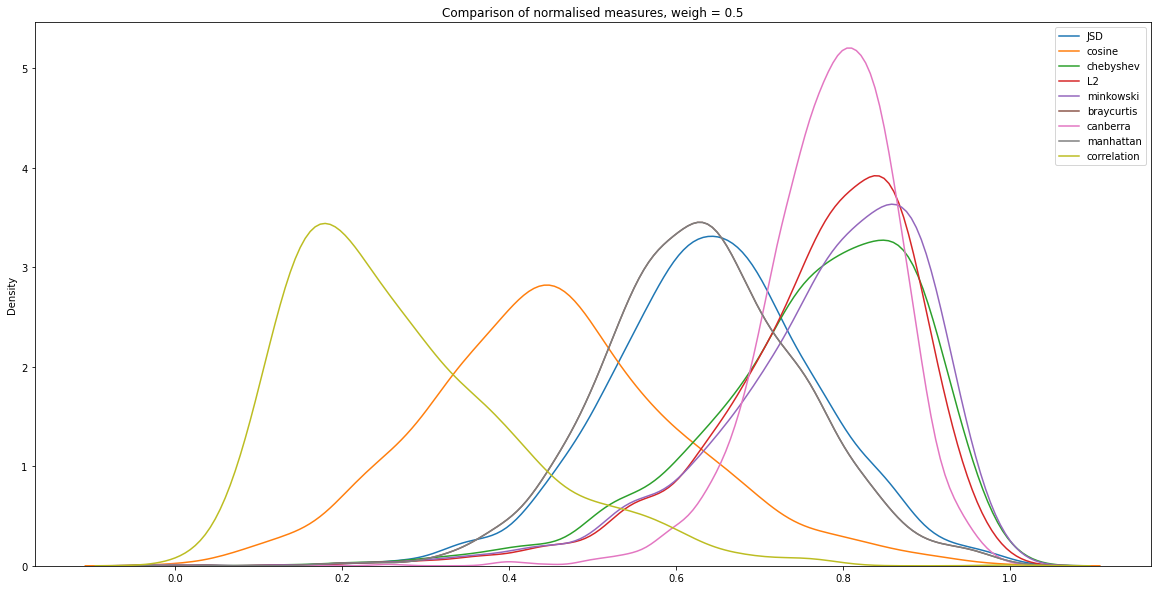

In [14]:
fig = plt.figure(1, figsize=(20, 10))
for measure in measures:
    sns.kdeplot(ms[measure], label=measure)
plt.legend() 
plt.title('Comparison of normalised measures, weigh = 0.5')
plt.show()

    We can make 5 groups
    We verify that we have superposition between Manhattan and Braycurtis curve, because they are the same on normalized data
    We will keep Manhattan

In [15]:
measures.remove('braycurtis')

### Shapiro test to see if the distribution is normal

In [16]:
for measure in measures:
    shapiro_test = stats.shapiro((ms[measure]-np.mean(ms[measure]))/np.std(ms[measure]))
    print(measure, shapiro_test)

JSD ShapiroResult(statistic=0.9957364201545715, pvalue=0.0002018342784140259)
cosine ShapiroResult(statistic=0.9941739439964294, pvalue=7.631038897670805e-06)
chebyshev ShapiroResult(statistic=0.9339924454689026, pvalue=7.734368256311944e-26)
L2 ShapiroResult(statistic=0.9194713830947876, pvalue=3.4656336569858124e-28)
minkowski ShapiroResult(statistic=0.9183048009872437, pvalue=2.3211396764014894e-28)
canberra ShapiroResult(statistic=0.9417777061462402, pvalue=2.065783938830248e-24)
manhattan ShapiroResult(statistic=0.9955908060073853, pvalue=0.0001459739578422159)
correlation ShapiroResult(statistic=0.9357225298881531, pvalue=1.5629513760678917e-25)


In [17]:
# generate univariate observations
# normality test
for measure in measures:
    stat, p = shapiro((ms[measure]-np.mean(ms[measure]))/np.std(ms[measure]))
    print('Statistics=%.3f, p=%.3f' % (stat, p))
    # interpret
    alpha = 0.05
    if p > alpha:
        print('Sample looks Gaussian (fail to reject H0)')
    else:
        print('Sample does not look Gaussian (reject H0)')

Statistics=0.996, p=0.000
Sample does not look Gaussian (reject H0)
Statistics=0.994, p=0.000
Sample does not look Gaussian (reject H0)
Statistics=0.934, p=0.000
Sample does not look Gaussian (reject H0)
Statistics=0.919, p=0.000
Sample does not look Gaussian (reject H0)
Statistics=0.918, p=0.000
Sample does not look Gaussian (reject H0)
Statistics=0.942, p=0.000
Sample does not look Gaussian (reject H0)
Statistics=0.996, p=0.000
Sample does not look Gaussian (reject H0)
Statistics=0.936, p=0.000
Sample does not look Gaussian (reject H0)


/home/stsapoui/Project/env/lib/python3.8/site-packages/statsmodels/graphics/gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


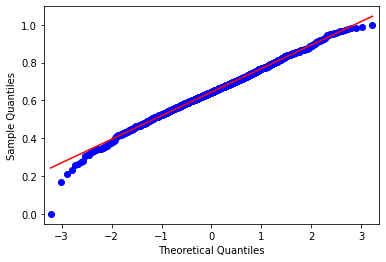

/home/stsapoui/Project/env/lib/python3.8/site-packages/statsmodels/graphics/gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


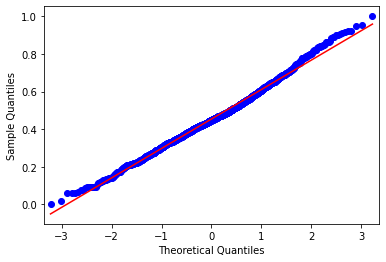

/home/stsapoui/Project/env/lib/python3.8/site-packages/statsmodels/graphics/gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


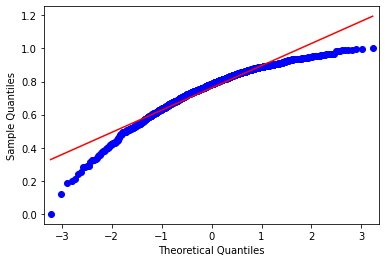

/home/stsapoui/Project/env/lib/python3.8/site-packages/statsmodels/graphics/gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


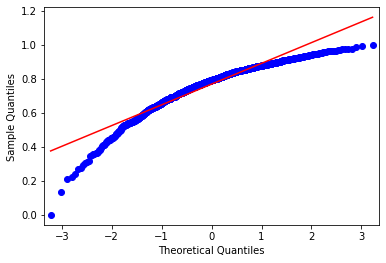

/home/stsapoui/Project/env/lib/python3.8/site-packages/statsmodels/graphics/gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


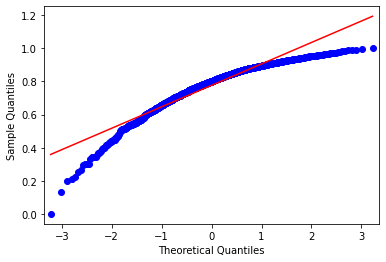

/home/stsapoui/Project/env/lib/python3.8/site-packages/statsmodels/graphics/gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


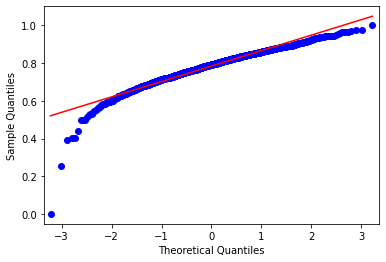

/home/stsapoui/Project/env/lib/python3.8/site-packages/statsmodels/graphics/gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


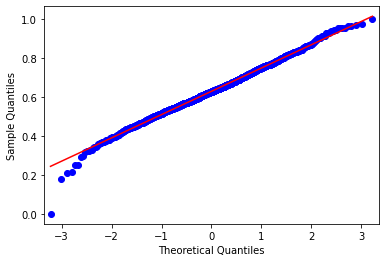

/home/stsapoui/Project/env/lib/python3.8/site-packages/statsmodels/graphics/gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


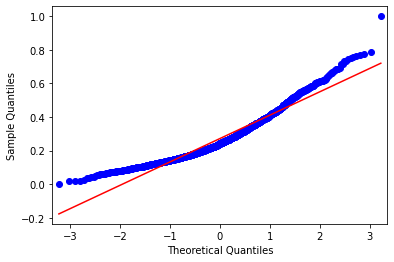

In [18]:
for measure in measures:
    qqplot(np.array(ms[measure]), line='s')
    pyplot.show()

In [19]:
weights ={measure : 0.5 for measure in measures}

In [20]:
matrix_prediction = similarity.same_prediction(weights)

step 1/431 : 0.7295165061950684sec
step 2/431 : 0.728355884552002sec
step 3/431 : 0.7342321872711182sec
step 4/431 : 0.7288463115692139sec
step 5/431 : 0.736351728439331sec
step 6/431 : 0.7350454330444336sec
step 7/431 : 0.7341132164001465sec
step 8/431 : 0.7382192611694336sec
step 9/431 : 0.7346456050872803sec
step 10/431 : 0.7310454845428467sec
step 11/431 : 0.7292649745941162sec
step 12/431 : 0.7359998226165771sec
step 13/431 : 0.7265274524688721sec
step 14/431 : 0.7290267944335938sec
step 15/431 : 0.7275004386901855sec
step 16/431 : 0.7260434627532959sec
step 17/431 : 0.7294058799743652sec
step 18/431 : 0.7398231029510498sec
step 19/431 : 0.7424600124359131sec
step 20/431 : 0.7254424095153809sec
step 21/431 : 0.7256371974945068sec
step 22/431 : 0.725872278213501sec
step 23/431 : 0.7248210906982422sec
step 24/431 : 0.7260098457336426sec
step 25/431 : 0.736501932144165sec
step 26/431 : 0.7400789260864258sec
step 27/431 : 0.7305800914764404sec
step 28/431 : 0.7258176803588867sec
step 

step 227/431 : 0.7764079570770264sec
step 228/431 : 0.7315592765808105sec
step 229/431 : 0.738274097442627sec
step 230/431 : 0.7343621253967285sec
step 231/431 : 0.777789831161499sec
step 232/431 : 0.7308499813079834sec
step 233/431 : 0.731391191482544sec
step 234/431 : 0.7354609966278076sec
step 235/431 : 0.7357199192047119sec
step 236/431 : 0.7413489818572998sec
step 237/431 : 0.7358417510986328sec
step 238/431 : 0.7365868091583252sec
step 239/431 : 0.7322168350219727sec
step 240/431 : 0.7549493312835693sec
step 241/431 : 0.7350902557373047sec
step 242/431 : 0.7563681602478027sec
step 243/431 : 0.7261786460876465sec
step 244/431 : 0.7311177253723145sec
step 245/431 : 0.8005988597869873sec
step 246/431 : 0.8244898319244385sec
step 247/431 : 0.824591875076294sec
step 248/431 : 0.7990438938140869sec
step 249/431 : 0.7220919132232666sec
step 250/431 : 0.7313735485076904sec
step 251/431 : 0.7257654666900635sec
step 252/431 : 0.7360000610351562sec
step 253/431 : 0.725862979888916sec
step 2

In [21]:
matrix_prediction

,JSD,cosine,chebyshev,L2,minkowski,canberra,manhattan,correlation
JSD,0,92153110,216326814,181660734,203630174,223326410,52645444,212310450
cosine,92153110,0,197986180,175241300,190892260,265544138,124622036,205708988
chebyshev,216326814,197986180,0,73743236,47533362,331134004,234755686,331735074
L2,181660734,175241300,73743236,0,32299048,320621638,199373692,312020798
minkowski,203630174,190892260,47533362,32299048,0,330069746,221952006,325639506
canberra,223326410,265544138,331134004,320621638,330069746,0,203344196,272812630
manhattan,52645444,124622036,234755686,199373692,221952006,203344196,0,216342174
correlation,212310450,205708988,331735074,312020798,325639506,272812630,216342174,0


In [22]:
(1-matrix_prediction/matrix_prediction.max().max()).style.background_gradient(cmap='Reds')

,JSD,cosine,chebyshev,L2,minkowski,canberra,manhattan,correlation
JSD,1.000000,0.722209,0.347893,0.452392,0.386166,0.326793,0.841303,0.360000
cosine,0.722209,1.000000,0.403180,0.471743,0.424564,0.199530,0.624333,0.379900
chebyshev,0.347893,0.403180,1.000000,0.777704,0.856713,0.001812,0.292340,0.000000
L2,0.452392,0.471743,0.777704,1.000000,0.902636,0.033501,0.398997,0.059428
minkowski,0.386166,0.424564,0.856713,0.902636,1.000000,0.005020,0.330936,0.018375
canberra,0.326793,0.199530,0.001812,0.033501,0.005020,1.000000,0.387028,0.177619
manhattan,0.841303,0.624333,0.292340,0.398997,0.330936,0.387028,1.000000,0.347847
correlation,0.360000,0.379900,0.000000,0.059428,0.018375,0.177619,0.347847,1.000000


In [23]:
(1-matrix_prediction).style.background_gradient(cmap='Reds')

,JSD,cosine,chebyshev,L2,minkowski,canberra,manhattan,correlation
JSD,1,-92153109,-216326813,-181660733,-203630173,-223326409,-52645443,-212310449
cosine,-92153109,1,-197986179,-175241299,-190892259,-265544137,-124622035,-205708987
chebyshev,-216326813,-197986179,1,-73743235,-47533361,-331134003,-234755685,-331735073
L2,-181660733,-175241299,-73743235,1,-32299047,-320621637,-199373691,-312020797
minkowski,-203630173,-190892259,-47533361,-32299047,1,-330069745,-221952005,-325639505
canberra,-223326409,-265544137,-331134003,-320621637,-330069745,1,-203344195,-272812629
manhattan,-52645443,-124622035,-234755685,-199373691,-221952005,-203344195,1,-216342173
correlation,-212310449,-205708987,-331735073,-312020797,-325639505,-272812629,-216342173,1


### Evaluation of performance

In [ ]:
field, tag = similarity.evaluation(data_eval, measures)

JSD
0.0
0.1
0.2
0.30000000000000004
0.4
0.5
0.6000000000000001
0.7000000000000001


In [ ]:
classified_field_pie = {measure : [] for measure in measures}
classified_tag_pie = {measure : [] for measure in measures}
for f, t, measure in zip(field.values(), tag.values(), measures):
    print(measure)
    for weight in np.linspace(0,1,11):
        sub_field = f[f["Weight"]==weight]
        sub_tag = t[t["Weight"]==weight]
        display(sub_field.style.background_gradient(cmap="Reds"))
        display(sub_tag.style.background_gradient(cmap="Reds"))
        classified_field_pie[measure].append([sub_field['Well classified field'].sum(axis=0),sub_field['Badly classified field'].sum(axis=0)])
        classified_tag_pie[measure].append([sub_tag['Well classified tag'].sum(axis=0),sub_tag['Badly classified tag'].sum(axis=0)])

In [ ]:
for measure in measures:
    
    # create a figure with two subplots
    fig, ax = plt.subplots(3,11, figsize=(100, 20))
    
    # plot each pie chart in a separate subplot
    for j, weight in enumerate(np.linspace(0,1,11)):
        ax[0][j].pie(classified_field_pie[measure][j], labels = ["Well classified field","Badly classified field"], normalize = True, autopct = lambda x: str(round(x, 2)) + '%')
        ax[0][j].set_title(measure + " " + str(weight))
        ax[1][j].pie(classified_tag_pie[measure][j], labels = ["Well classified tag","Badly classified tag"], normalize = True, autopct = lambda x: str(round(x, 2)) + '%')
        ax[1][j].set_title(measure + " " + str(weight))
        ax[2][j].pie([field+tag for field,tag in zip(classified_field_pie[measure][j],classified_tag_pie[measure][j])], labels = ["Well classified","Badly classified"], normalize = True, autopct = lambda x: str(round(x, 2)) + '%')
        ax[2][j].set_title(measure + " " + str(weight))
    plt.show()
    print(120*"*")

In [ ]:
field2, tag2 = similarity.evaluation2(data_eval, measures)

In [ ]:
classified_field_pie = {measure : [] for measure in measures}
classified_tag_pie = {measure : [] for measure in measures}
for f, t, measure in zip(field2.values(), tag2.values(), measures):
    print(measure)
    for weight in np.linspace(0,1,11):
        sub_field = f[f["Weight"]==weight]
        sub_tag = t[t["Weight"]==weight]
        display(sub_field.style.background_gradient(cmap="Reds"))
        display(sub_tag.style.background_gradient(cmap="Reds"))
        classified_field_pie[measure].append([sub_field['Well classified field'].sum(axis=0),sub_field['Badly classified field'].sum(axis=0)])
        classified_tag_pie[measure].append([sub_tag['Well classified tag'].sum(axis=0),sub_tag['Badly classified tag'].sum(axis=0)])

In [ ]:
for measure in measures:
    
    # create a figure with two subplots
    fig, ax = plt.subplots(3,11, figsize=(100, 20))
    
    # plot each pie chart in a separate subplot
    for j, weight in enumerate(np.linspace(0,1,11)):
        ax[0][j].pie(classified_field_pie[measure][j], labels = ["Well classified field","Badly classified field"], normalize = True, autopct = lambda x: str(round(x, 2)) + '%')
        ax[0][j].set_title(measure + " " + str(weight))
        ax[1][j].pie(classified_tag_pie[measure][j], labels = ["Well classified tag","Badly classified tag"], normalize = True, autopct = lambda x: str(round(x, 2)) + '%')
        ax[1][j].set_title(measure + " " + str(weight))
        ax[2][j].pie([field+tag for field,tag in zip(classified_field_pie[measure][j],classified_tag_pie[measure][j])], labels = ["Well classified","Badly classified"], normalize = True, autopct = lambda x: str(round(x, 2)) + '%')
        ax[2][j].set_title(measure + " " + str(weight))
    plt.show()
    print(120*"*")

In [ ]:
for measure in measures:
    temp = [(field[0] )/(field[0]  + field[1] ) for field,tag in zip(classified_field_pie[measure],classified_tag_pie[measure])]
    plt.plot(np.linspace(0,1,11),temp,label = measure)
plt.legend() 
plt.title("Ratio of overall good classification ")
plt.show()

In [ ]:
best_measure = [(field[0] )/(field[0]  + field[1] ) for field,tag in zip(classified_field_pie["JSD"],classified_tag_pie["JSD"])]
best_measure

In [ ]:
with open('Saved Data/best_measure3_V2', 'wb') as f:
    pickle.dump(best_measure, f)

1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,

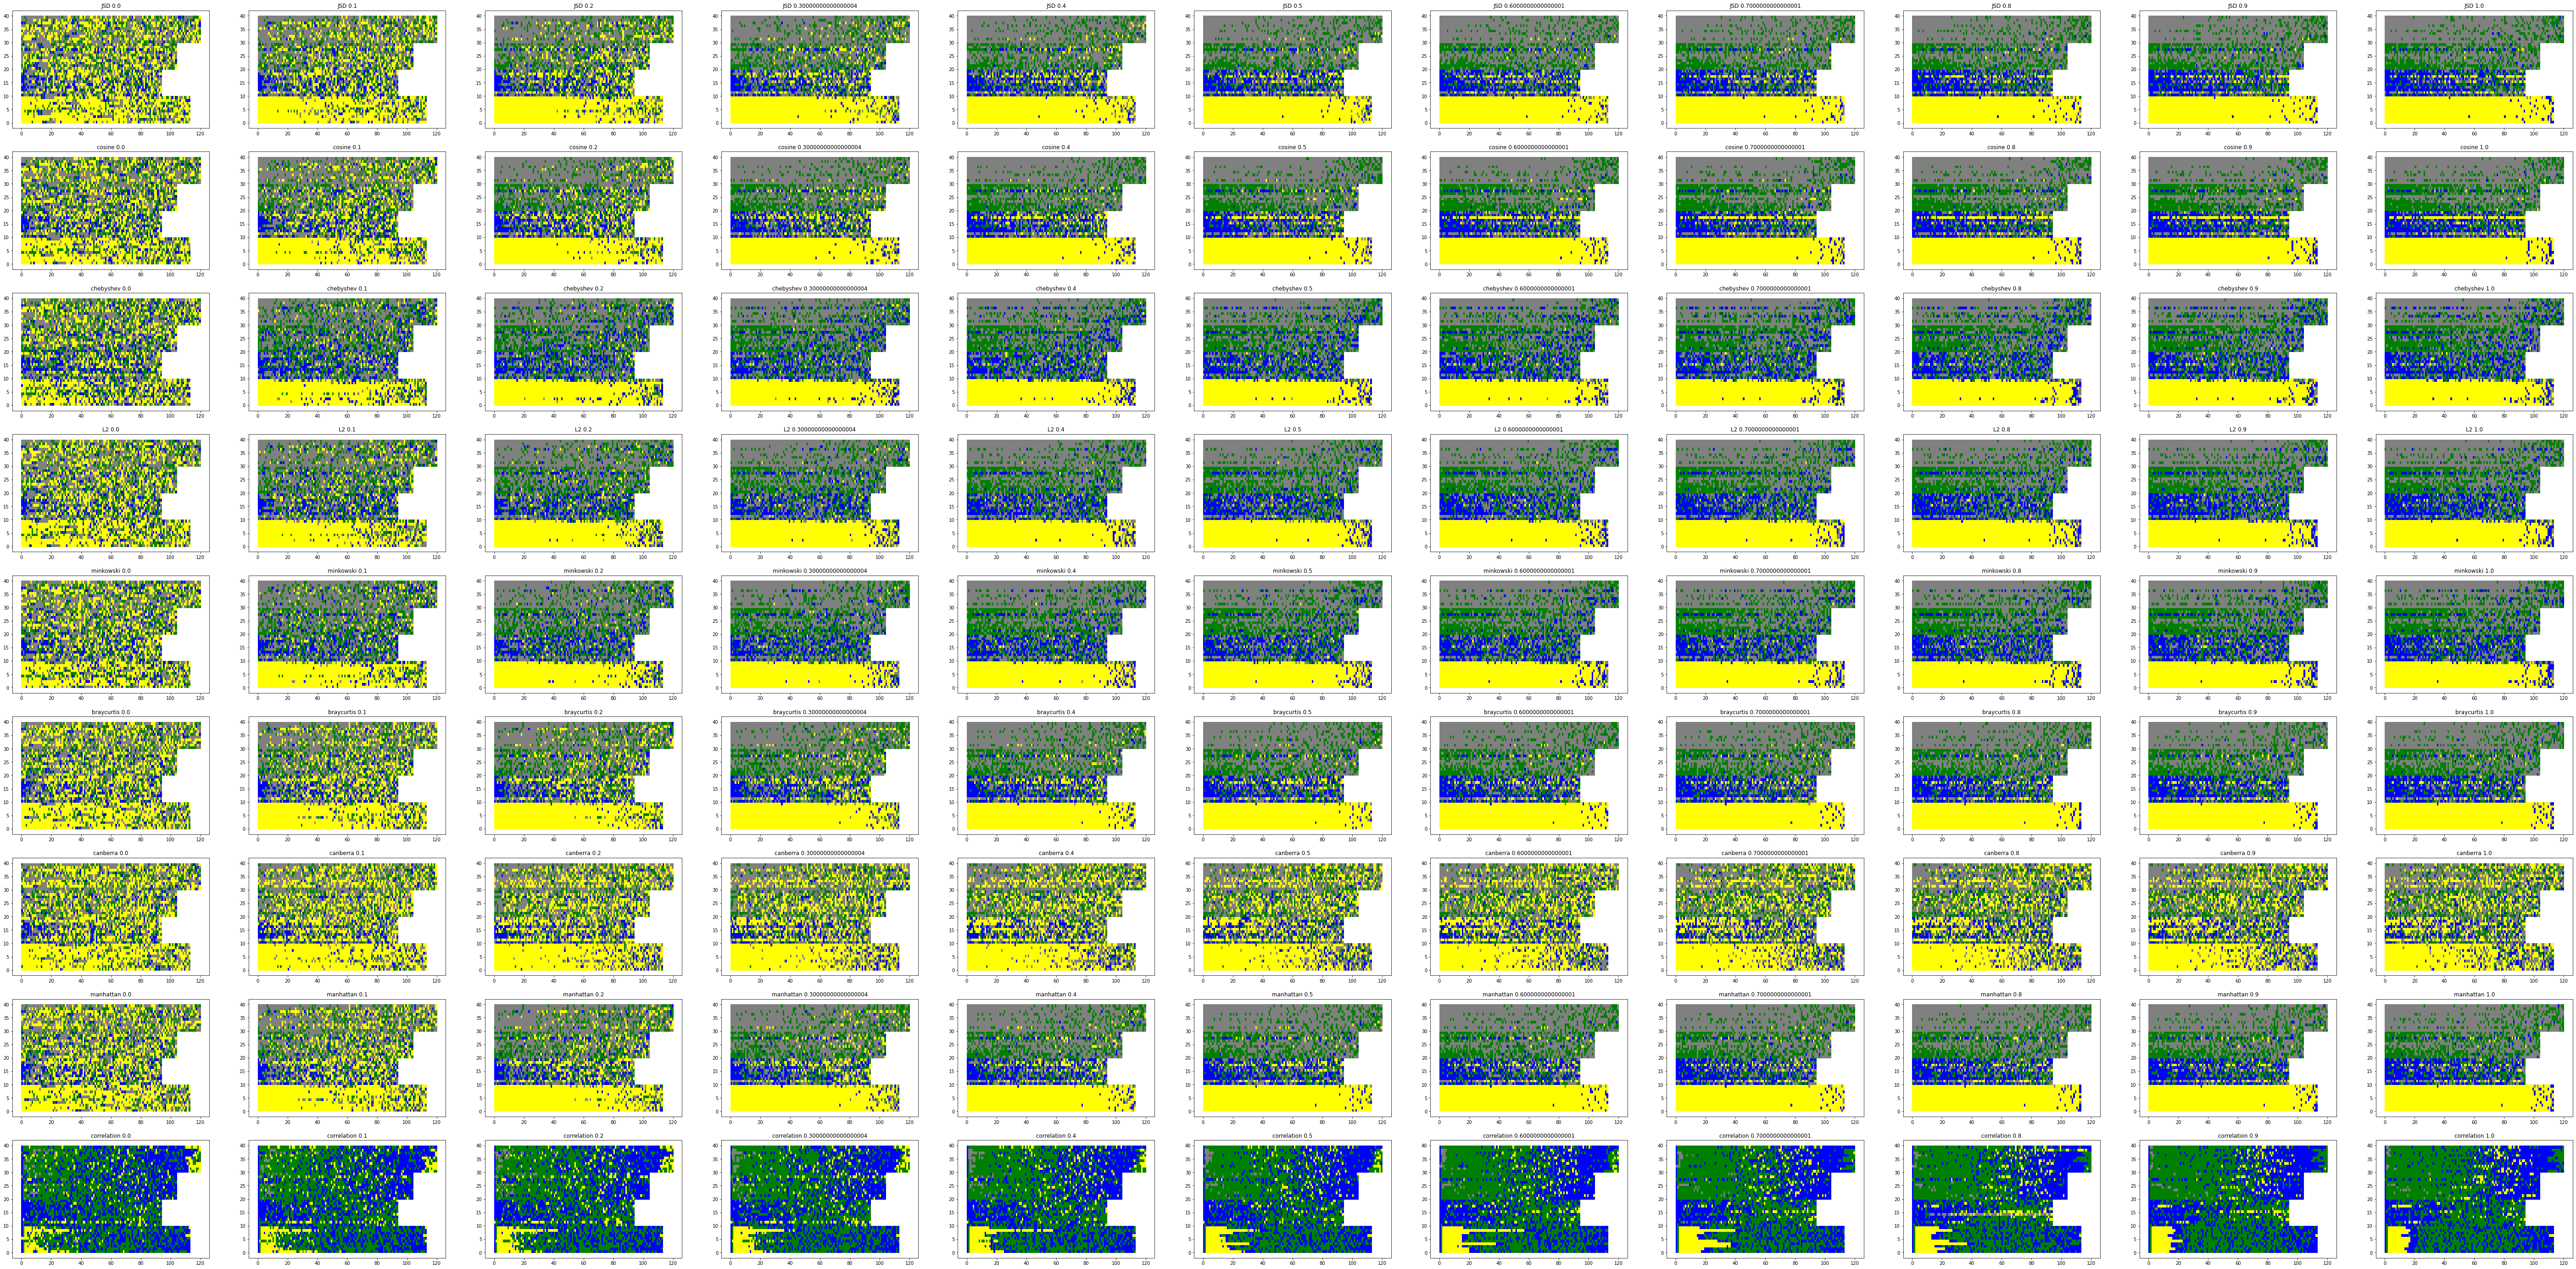

In [59]:
fig, ax = repartition_similarity_v1(data_eval, distr_body_eval, distr_abstract_eval_v1, measures)

In [60]:
fig.savefig("Saved Data/repartitionV1")